In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [2]:
df=pd.read_csv('D:/diamonds.csv')

**UNDERSTANDING DATA**

In [3]:
df.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
23520,23521,2.01,Good,J,VS1,63.7,59.0,11526,7.93,7.86,5.03
17847,17848,1.07,Ideal,G,VS1,62.0,56.0,7198,6.58,6.52,4.06
3448,3449,0.91,Very Good,G,SI2,61.8,59.0,3388,6.17,6.23,3.83
27210,27211,2.00,Ideal,F,SI2,62.9,56.0,17534,7.94,8.01,5.02
44644,44645,0.28,Very Good,H,VVS2,62.7,54.0,522,4.16,4.19,2.61
26066,26067,2.11,Fair,I,SI1,67.2,60.0,15282,7.86,7.80,5.26
29474,29475,0.40,Premium,G,SI1,62.0,59.0,702,4.71,4.74,2.93
40408,40409,0.41,Very Good,E,VVS2,63.1,58.0,1133,4.75,4.72,2.99
5916,5917,0.71,Premium,E,VVS1,61.8,56.0,3936,5.71,5.68,3.52
46607,46608,0.54,Ideal,D,SI1,62.4,57.0,1786,5.23,5.19,3.25


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
categorical=df.loc[:,['cut','color','clarity']]

In [6]:
cdf={'cut':categorical["cut"].unique(), 'color':categorical["color"].unique(),'clarity':categorical["clarity"].unique()}
print(cdf)

{'cut': array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object), 'color': array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object), 'clarity': array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)}


In [7]:
a,b,c=['Ideal', 'Premium', 'Very Good','Good',  'Fair'],['D','E','F','G','H','I','J'],['IF',"VVS1","VVS2","VS1","VS2","SI1","SI2","I1"]
a=a[::-1]
b=b[::-1]
c=c[::-1]
print({"a":a,"b":b,"c":c})

{'a': ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 'b': ['J', 'I', 'H', 'G', 'F', 'E', 'D'], 'c': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}


In [8]:
oe=OrdinalEncoder(categories=[a,b,c])
df[['cut','color','clarity']]=oe.fit_transform(df[['cut','color','clarity']])

In [9]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
287,0.81,2.0,5.0,2.0,60.3,60.0,2797,6.07,6.10,3.67
13195,1.27,2.0,0.0,3.0,61.8,60.0,5455,6.90,6.94,4.28
29915,0.33,4.0,3.0,5.0,62.3,56.0,713,4.43,4.47,2.77
53404,0.76,2.0,5.0,2.0,63.0,59.0,2668,5.76,5.80,3.64
28502,0.29,4.0,3.0,7.0,60.6,57.0,673,4.28,4.31,2.60


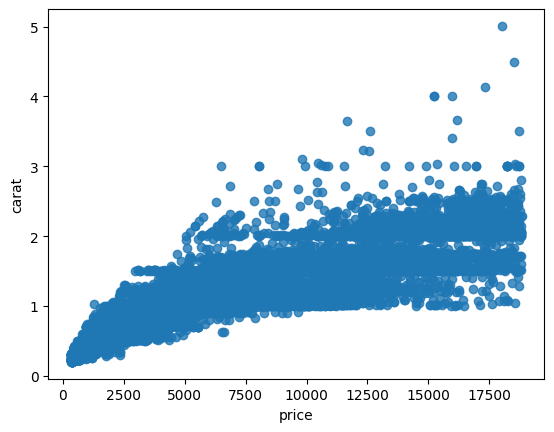

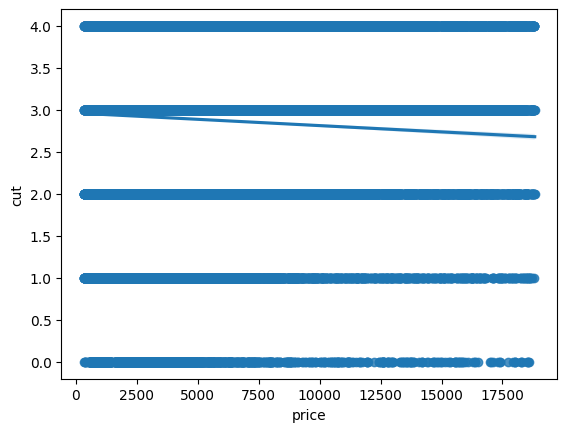

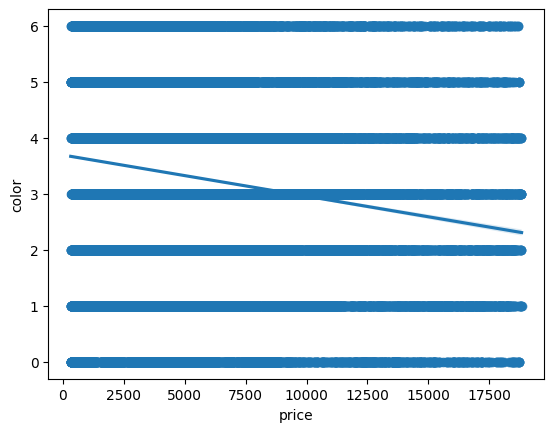

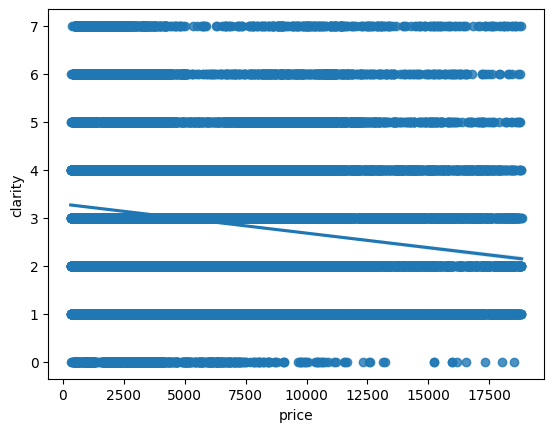

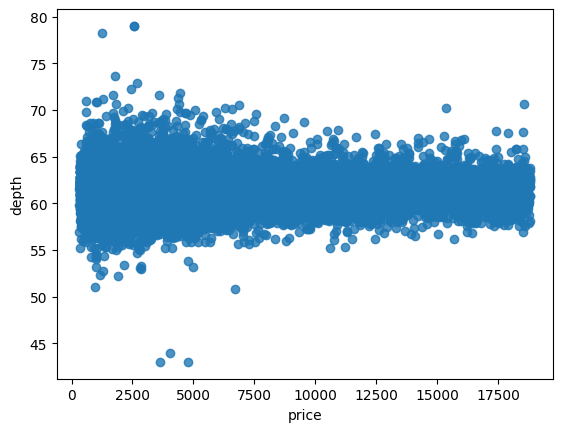

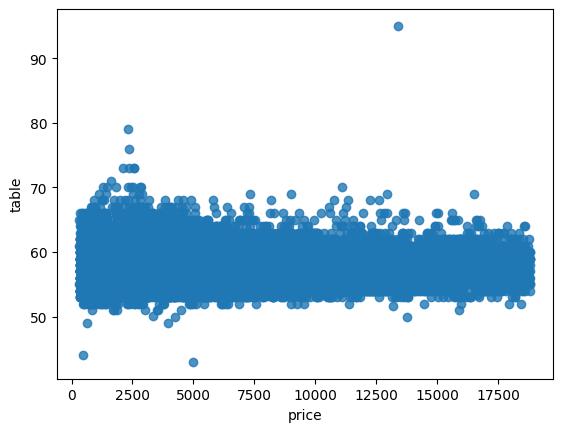

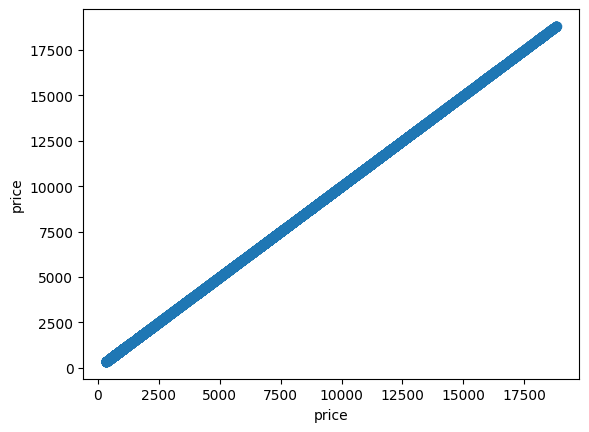

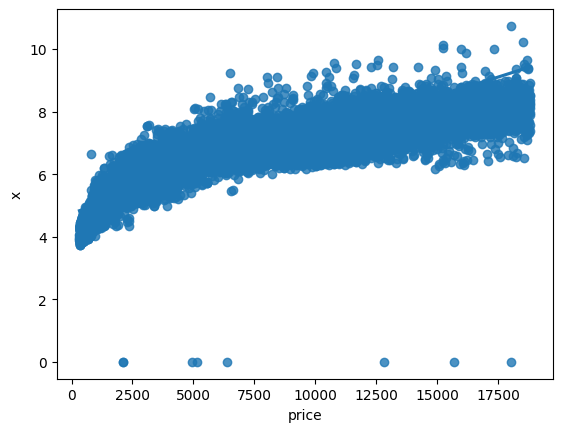

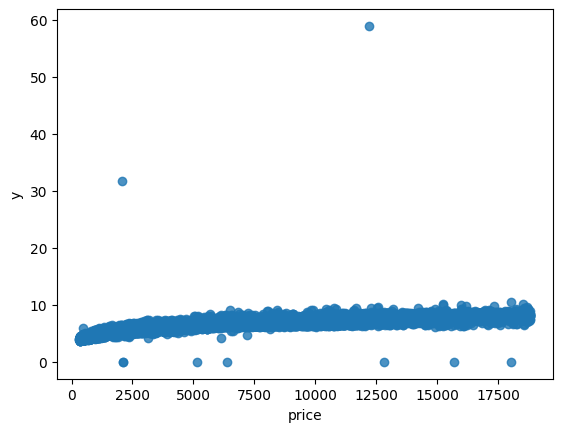

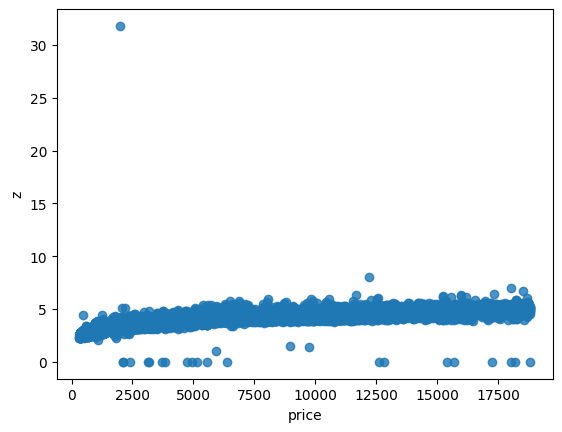

In [10]:
for i in df.columns:
    sns.regplot(y=df[i],x=df.price)
    plt.show()

**BY observing above Charts we can Understand x,y,z have 0 values which can't be possible (for 0 diamention Diamond so we have to change the 
value for x,y,z for remove this values from the given data set )**

In [11]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

<Axes: >

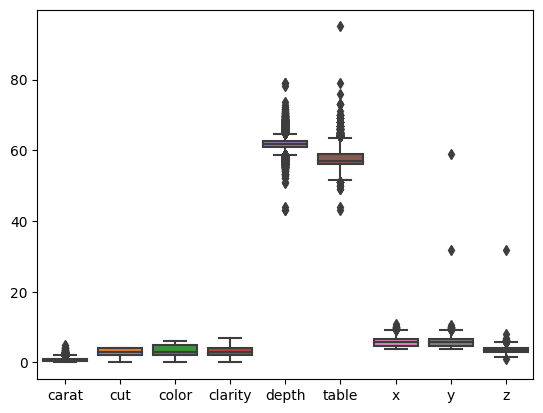

In [12]:
sns.boxplot(df.drop(columns='price'))

<Axes: >

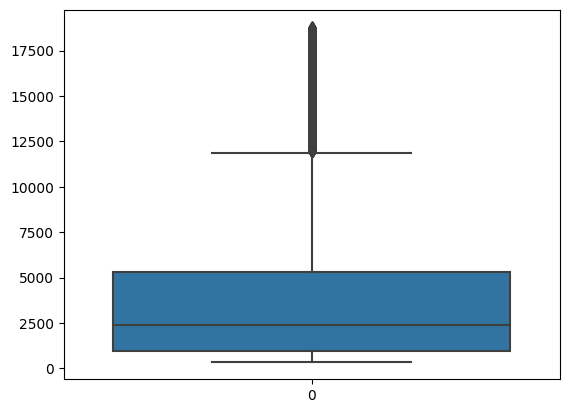

In [13]:
sns.boxplot(df.price)

In [14]:
#CApping Outliers
def outcap(df):
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        iqr= Q3 - Q1
        upper=Q3+1.5*iqr
        lower=Q1-1.5*iqr
        df[i]=np.where(df[i]>=upper, upper,np.where(df[i]<=lower,lower,df[i]))
    return df
outcap(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4.0,5.0,1.0,61.50,55.0,326.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.80,61.0,326.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,58.75,63.5,327.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.40,58.0,334.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.30,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.80,57.0,2757.0,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,63.10,55.0,2757.0,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,62.80,60.0,2757.0,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,61.00,58.0,2757.0,6.15,6.12,3.74


<Axes: >

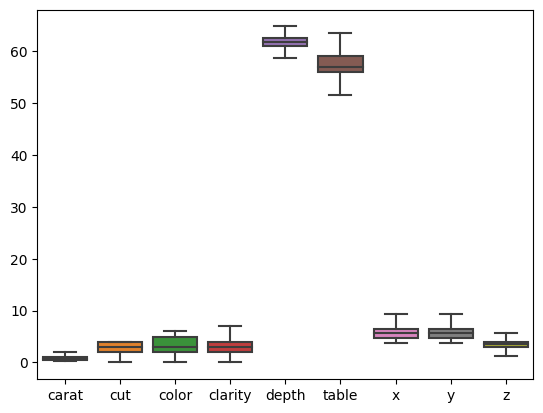

In [15]:
sns.boxplot(df.drop(columns='price'))

<Axes: >

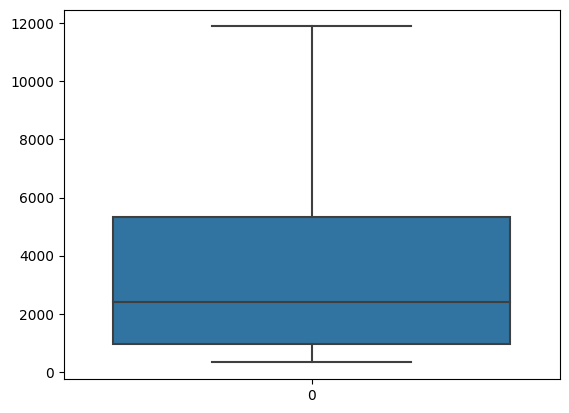

In [16]:
sns.boxplot(df.price)

In [17]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.792346,2.904228,3.405972,3.051502,61.749229,57.438270,3730.824694,5.731463,5.733413,3.539362
std,0.456956,1.116579,1.701272,1.647005,1.269961,2.160902,3435.755287,1.118851,1.110978,0.691175
min,0.200000,0.000000,0.000000,0.000000,58.750000,51.500000,326.000000,3.730000,3.680000,1.215000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,2.000000,4.000000,6.000000,7.000000,64.750000,63.500000,11884.625000,9.285000,9.270000,5.735000


<Axes: >

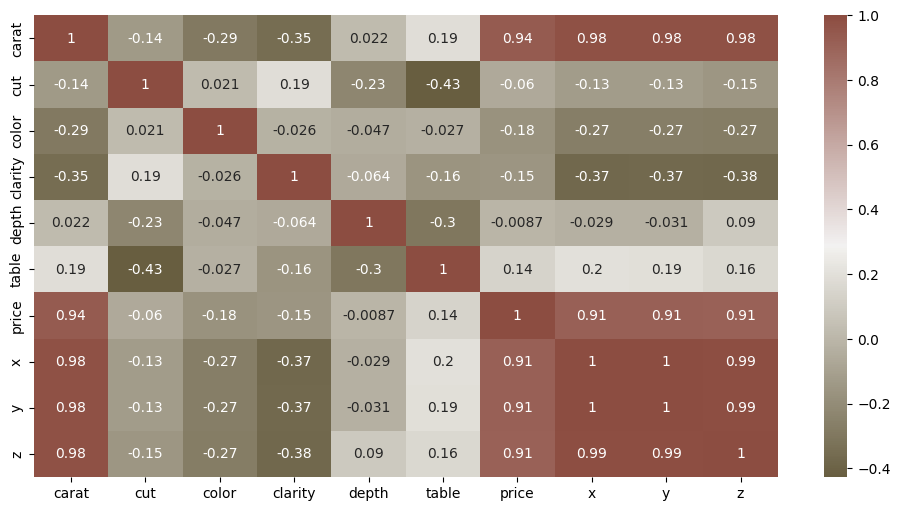

In [18]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [20]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='price'),df.price,test_size=0.20,random_state=40)


In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
print({'intercept':lr.intercept_,'coef':lr.coef_})

{'intercept': -9201.83721878961, 'coef': array([ 9072.16939967,   113.82141377,   269.75264948,   429.80103752,
         107.12672363,   -13.26454914,  -771.58679161,  1658.86095098,
       -2192.52728254])}


In [23]:
print({'train':lr.score(X_train,y_train),'test':lr.score(X_test,y_test)})

{'train': 0.9320480586969214, 'test': 0.9300254567316965}


In [24]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9783776531207058

In [25]:
from sklearn.tree import plot_tree

In [26]:
plt.figure(figsize=(10,6))
plot_tree(dt)
plt.show()

In [ ]:
LA=Lasso(alpha=1,fit_intercept=True)
LA.fit(X_train,y_train)
LA.score (X_train,y_train)
LA.score(X_test,y_test)

C:\Users\aishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.464e+08, tolerance: 5.074e+07
  model = cd_fast.enet_coordinate_descent(


0.9300968282584977

In [ ]:
print(X_test)

       carat  cut  color  clarity  depth  table     x     y     z
8917    0.80  2.0    5.0      4.0   62.4   54.0  5.98  5.94  3.72
20172   1.06  4.0    3.0      5.0   60.1   57.0  6.61  6.66  3.99
2562    0.79  4.0    4.0      2.0   60.8   55.0  5.98  6.05  3.66
28447   0.31  4.0    2.0      6.0   60.9   56.0  4.40  4.42  2.69
1661    0.90  2.0    0.0      3.0   63.1   59.0  6.09  6.05  3.83
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
19418   1.24  2.0    5.0      2.0   61.7   59.0  6.85  6.89  4.24
39909   0.50  4.0    5.0      1.0   62.6   56.0  5.05  5.11  3.18
49118   0.56  4.0    3.0      5.0   61.6   55.0  5.32  5.35  3.28
1787    0.76  4.0    2.0      2.0   61.4   55.0  5.82  5.90  3.60
23888   1.52  2.0    3.0      3.0   63.4   58.0  7.31  7.24  4.61

[10784 rows x 9 columns]


In [ ]:
print(y_test)

8917      4495.000
20172     8626.000
2562      3210.000
28447      671.000
1661      3024.000
           ...    
19418     8073.000
39909     1104.000
49118     2066.000
1787      3050.000
23888    11884.625
Name: price, Length: 10784, dtype: float64


In [ ]:
lr.predict([[0.80,2.0,5.0,4.0,62.4,54.0,5.98,5.94,3.72]])

C:\Users\aishi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4403.2739707])

In [ ]:
import pickle
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [ ]:
with open('desicionTree.pkl', 'wb') as file:
    pickle.dump(dt, file)